In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn import decomposition
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score
from xgboost import XGBClassifier
import warnings
from sklearn.ensemble import BaggingClassifier 
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier
warnings.filterwarnings("ignore")

fashion = pd.read_csv(r'C:\Users\USER\Desktop\fashion-mnist_train.csv')
pd.set_option("max_columns", None)
fashion

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,pixel39,pixel40,pixel41,pixel42,pixel43,pixel44,pixel45,pixel46,pixel47,pixel48,pixel49,pixel50,pixel51,pixel52,pixel53,pixel54,pixel55,pixel56,pixel57,pixel58,pixel59,pixel60,pixel61,pixel62,pixel63,pixel64,pixel65,pixel66,pixel67,pixel68,pixel69,pixel70,pixel71,pixel72,pixel73,pixel74,pixel75,pixel76,pixel77,pixel78,pixel79,pixel80,pixel81,pixel82,pixel83,pixel84,pixel85,pixel86,pixel87,pixel88,pixel89,pixel90,pixel91,pixel92,pixel93,pixel94,pixel95,pixel96,pixel97,pixel98,pixel99,pixel100,pixel101,pixel102,pixel103,pixel104,pixel105,pixel106,pixel107,pixel108,pixel109,pixel110,pixel111,pixel112,pixel113,pixel114,pixel115,pixel116,pixel117,pixel118,pixel119,pixel120,pixel121,pixel122,pixel123,pixel124,pixel125,pixel126,pixel127,pixel128,pixel129,pixel130,pixel131,pixel132,pixel133,pixel134,pixel135,pixel136,pixel137,pixel138,pixel139,pixel140,pixel141,pixel142,pixel143,pixel144,pixel145,pixel146,pixel147,pixel148,pixel149,pixel150,pixel151,pixel152,pixel153,pixel154,pixel155,pixel156,pixel157,pixel158,pixel159,pixel160,pixel161,pixel162,pixel163,pixel164,pixel165,pixel166,pixel167,pixel168,pixel169,pixel170,pixel171,pixel172,pixel173,pixel174,pixel175,pixel176,pixel177,pixel178,pixel179,pixel180,pixel181,pixel182,pixel183,pixel184,pixel185,pixel186,pixel187,pixel188,pixel189,pixel190,pixel191,pixel192,pixel193,pixel194,pixel195,pixel196,pixel197,pixel198,pixel199,pixel200,pixel201,pixel202,pixel203,pixel204,pixel205,pixel206,pixel207,pixel208,pixel209,pixel210,pixel211,pixel212,pixel213,pixel214,pixel215,pixel216,pixel217,pixel218,pixel219,pixel220,pixel221,pixel222,pixel223,pixel224,pixel225,pixel226,pixel227,pixel228,pixel229,pixel230,pixel231,pixel232,pixel233,pixel234,pixel235,pixel236,pixel237,pixel238,pixel239,pixel240,pixel241,pixel242,pixel243,pixel244,pixel245,pixel246,pixel247,pixel248,pixel249,pixel250,pixel251,pixel252,pixel253,pixel254,pixel255,pixel256,pixel257,pixel258,pixel259,pixel260,pixel261,pixel262,pixel263,pixel264,pixel265,pixel266,pixel267,pixel268,pixel269,pixel270,pixel271,pixel272,pixel273,pixel274,pixel275,pixel276,pixel277,pixel278,pixel279,pixel280,pixel281,pixel282,pixel283,pixel284,pixel285,pixel286,pixel287,pixel288,pixel289,pixel290,pixel291,pixel292,pixel293,pixel294,pixel295,pixel296,pixel297,pixel298,pixel299,pixel300,pixel301,pixel302,pixel303,pixel304,pixel305,pixel306,pixel307,pixel308,pixel309,pixel310,pixel311,pixel312,pixel313,pixel314,pixel315,pixel316,pixel317,pixel318,pixel319,pixel320,pixel321,pixel322,pixel323,pixel324,pixel325,pixel326,pixel327,pixel328,pixel329,pixel330,pixel331,pixel332,pixel333,pixel334,pixel335,pixel336,pixel337,pixel338,pixel339,pixel340,pixel341,pixel342,pixel343,pixel344,pixel345,pixel346,pixel347,pixel348,pixel349,pixel350,pixel351,pixel352,pixel353,pixel354,pixel355,pixel356,pixel357,pixel358,pixel359,pixel360,pixel361,pixel362,pixel363,pixel364,pixel365,pixel366,pixel367,pixel368,pixel369,pixel370,pixel371,pixel372,pixel373,pixel374,pixel375,pixel376,pixel377,pixel378,pixel379,pixel380,pixel381,pixel382,pixel383,pixel384,pixel385,pixel386,pixel387,pixel388,pixel389,pixel390,pixel391,pixel392,pixel393,pixel394,pixel395,pixel396,pixel397,pixel398,pixel399,pixel400,pixel401,pixel402,pixel403,pixel404,pixel405,pixel406,pixel407,pixel408,pixel409,pixel410,pixel411,pixel412,pixel413,pixel414,pixel415,pixel416,pixel417,pixel418,pixel419,pixel420,pixel421,pixel422,pixel423,pixel424,pixel425,pixel426,pixel427,pixel428,pixel429,pixel430,pixel431,pixel432,pixel433,pixel434,pixel435,pixel436,pixel437,pixel438,pixel439,pixel440,pixel441,pixel442,pixel443,pixel444,pixel445,pixel446,pixel447,pixel448,pixel449,pixel450,pixel451,pixel452,pixel453,pixel454,pixel455,pixel4

Data distribution


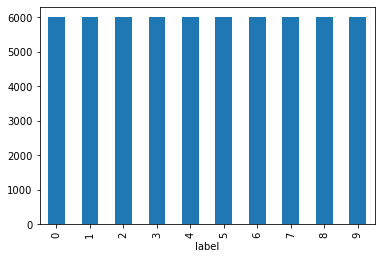

In [45]:
lables = fashion.groupby('label')['pixel1'].count()
lables.plot.bar()
print("Data distribution")
plt.show()

In [2]:
y_train = fashion["label"]
X_train = fashion.drop("label",axis=1)
X_test = pd.read_csv(r'C:\Users\USER\Desktop\fashion-mnist_test.csv')
y_test = X_test["label"]
X_test = X_test.drop("label",axis=1)

### xgboost classifier 

In [3]:
xg = XGBClassifier( use_label_encoder=False)
xg.fit(X_train, y_train)
y_pred = xg.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy with all the data: %.2f%%" % (accuracy * 100.0))

[21:17:32] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Accuracy with all the data: 90.62%


### Data Normalization

In [4]:
X_train = X_train/255.0
X_test = X_test/255.0

### PCA & Dimensionality  reduction

In [5]:
pca = PCA(.95)
lower_dimensional_data = pca.fit_transform(X_train)
print("number of components so 95% of the variance is retained", pca.n_components_)

number of components so 95% of the variance is retained 187


Before & After dimensionality reduction

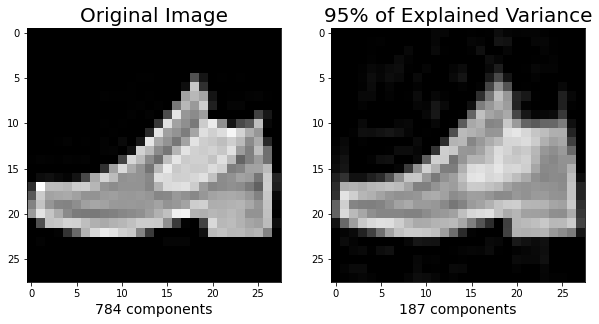

In [6]:
lower_dimensional_data = pca.fit_transform(X_train.to_numpy())

approximation = pca.inverse_transform(lower_dimensional_data)

plt.figure(figsize=(10,6))

plt.subplot(1, 2, 1);
plt.imshow(255*X_train.to_numpy()[1].reshape(28,28),
              cmap = plt.cm.gray, interpolation='nearest',
              clim=(0, 255));
plt.xlabel('784 components', fontsize = 14)
plt.title('Original Image', fontsize = 20);

plt.subplot(1, 2, 2);
plt.imshow(255*approximation[1].reshape(28, 28),cmap = plt.cm.gray, interpolation='nearest',clim=(0, 255))
plt.xlabel('187 components', fontsize = 14)
plt.title('95% of Explained Variance', fontsize = 20);

## Data visualization

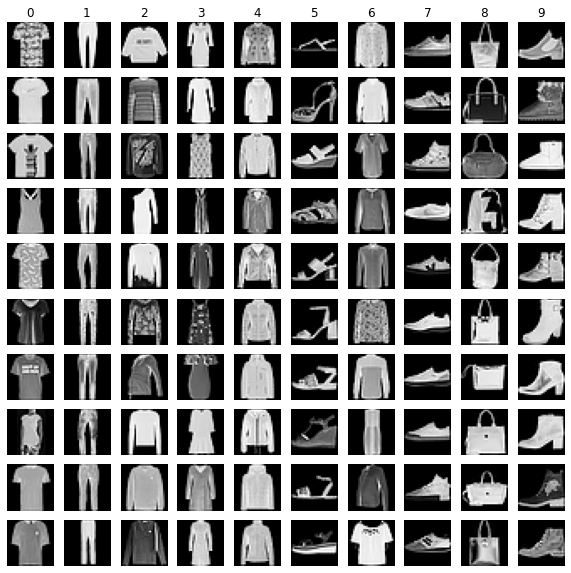

In [7]:
fashion.groupby(by='label').size()
fig, ax = plt.subplots(nrows=10, ncols=10, figsize=(10,10))
X_train = fashion.drop("label",axis=1)

for i in range(10):
    num_i = X_train[y_train == i]
    ax[0][i].set_title(i)
    for j in range(10):
        ax[j][i].axis('off')
        ax[j][i].imshow(num_i.iloc[j, :].to_numpy().astype(np.uint8).reshape(28, 28), cmap='gray')


shape of pca_reduced.shape =  (60000, 2)


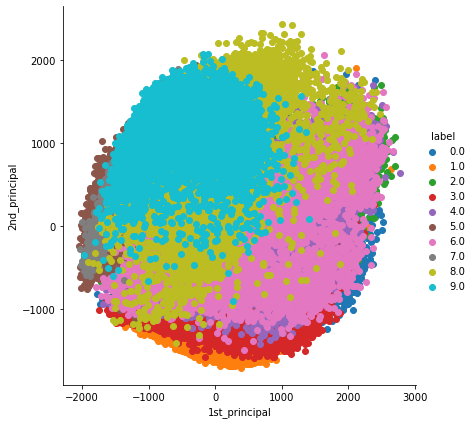

In [8]:
pca = decomposition.PCA()
pca.n_components = 2
pca_data = pca.fit_transform(X_train)
print("shape of pca_reduced.shape = ", pca_data.shape)
pca_data = np.vstack((pca_data.T, y_train)).T
pca_df = pd.DataFrame(data=pca_data, columns=("1st_principal", "2nd_principal", "label"))
sns.FacetGrid(pca_df, hue="label", size=6).map(plt.scatter, '1st_principal', '2nd_principal').add_legend()
plt.show()

### Data scaling & fitting

In [9]:
y_train = fashion["label"]
X_train = fashion.drop("label",axis=1)
X_test = pd.read_csv(r'C:\Users\USER\Desktop\fashion-mnist_test.csv')
y_test = X_test["label"]
X_test = X_test.drop("label",axis=1)
X_train = X_train/255.0
X_test = X_test/255.0
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)
pca = PCA(.95)
pca.fit(X_train)

X_train = pca.transform(X_train)
X_test = pca.transform(X_test)

In [10]:
from sklearn.linear_model import LogisticRegression

logisticRegr = LogisticRegression(solver = 'lbfgs')
logisticRegr.fit(X_train, y_train)
y_pred = logisticRegr.predict(X_test)
accuracy_score(y_test, y_pred)

0.8575

In [11]:
from sklearn.tree import DecisionTreeClassifier
bag = BaggingClassifier(DecisionTreeClassifier(),n_estimators=500,max_samples=100,bootstrap=True)
bag.fit(X_train,y_train)
y_pred=bag.predict(X_test)
print(accuracy_score(y_test,y_pred))

0.7356


In [12]:
from sklearn.preprocessing import StandardScaler
y_train = fashion["label"]
X_train = fashion.drop("label",axis=1)
X_test = pd.read_csv(r'C:\Users\USER\Desktop\fashion-mnist_test.csv')
y_test = X_test["label"]
X_test = X_test.drop("label",axis=1)

scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

pca = PCA(.95)
pca.fit(X_train)

X_train = pca.transform(X_train)
X_test = pca.transform(X_test)


0.7703


In [22]:
rnd = RandomForestClassifier()
knn = KNeighborsClassifier(n_neighbors = 50)
dt = DecisionTreeClassifier()
xg = XGBClassifier(use_label_encoder=True)

### Training different modules

In [17]:
xg.fit(X_train, y_train)
xg_acc = accuracy_score(y_test,xg.predict(X_test))

[21:26:45] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [18]:
knn.fit(X_train,y_train)
knn_acc = accuracy_score(y_test,knn.predict(X_test))

In [19]:
rnd.fit(X_train,y_train)
rnd_acc = accuracy_score(y_test,rnd.predict(X_test))

In [23]:
dt.fit(X_train, y_train)
dt_acc = accuracy_score(y_test,dt.predict(X_test))

In [24]:
vot = VotingClassifier(estimators = [('rf',rnd),('knn', knn),('xgboost',xg) ,('desicion tree',dt)], voting='hard')
vot.fit(X_train,y_train)
y_pred = vot.predict(X_test)
vot_acc = accuracy_score(y_test, vot.predict(X_test))
data = {'module': ['random forest', 'knn', 'xgboost', 'desicion tree', 'voting'], 'Accuracy': [rnd_acc, knn_acc, xg_acc, 
                                                                                               dt_acc, vot_acc]}
df = pd.DataFrame(data)

[22:58:42] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [29]:
df

,module,Accuracy
0,random forest,0.8657
1,knn,0.8455
2,xgboost,0.8868
3,desicion tree,0.7671
4,voting,0.8760


In [27]:
X_test.shape

(10000, 256)

As we can see from the table above the highest accuracy was for xgboost module with 256 features out of 785